<a href="https://colab.research.google.com/github/ekajanuartati/Customer_churn/blob/main/Churn_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data diri :

Ni Putu Eka januartati

**Business Understanding**

Masalah yang paling sering di hadapi CRM perusahaan operator telekomunikasi seluler dalah usaha menurunkan jumlah pelanggan yang berhenti menggunakan layanan perusahaan dan pindah ke perusahaan kompetitor. Perilaku pelanggan yang meninggalkan layanan yang diberikan perusahaan pada industri operator seluler disebut dengan *churn*.

Dalam perusahaan operator seluler tentu terdapat kerugian pendapatan, salah satunya yang diakibatkan banyaknya pelanggan yang berpaling pada operator lain (*churn*). Oleh karena itu *churn* dapat mengurangi keuntungan perusahaan, maka manajemen *churn* menjadi senjata yang krusial dalam berkompetisi, dan suatu fondasi pada suatu perusahaan pemasaran berorientasi pelanggan.

Dengan menggunakan pendekatan machine learning yang dilatih menggunakan data historical dari *churn* suatu perusahaan akan membantu dalam proses pemerolehan informasi berdasarkan prediksinya apakah dimasa yang akan datang sebagai contoh apakah akan terdapat pelanggan *churn* dalam klasifikasi ini (yes/no).  


**Problem Statements**


*   Apakah machine learning dapat diimplementasikan untuk studi kasus klasifikasi *churn* ?
*   Bagaimana performa masing-masing model machine learning yang akan digunakan pada studi kasus klasifikasi *churn* ?





**Goals**



*   Dapat mengimplementasikan model machine learning yang dilatih menggunakan data historical *churn*.
*   Mengevaluasi performa dari machine learning dan membandingkan satu sama lain.

**Data Understanding**

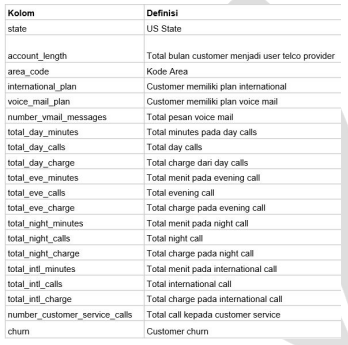

**Klasifikasi Churn**

Import Library yang diperlukan

In [ ]:
#import Library utama yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

**Data Preparation**

In [ ]:
#Load data
df = pd.read_csv('train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


**EDA (Exploratory Data Analysis)**

Data Quality Checking

In [ ]:
#Check missing value
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

<Figure size 432x288 with 0 Axes>

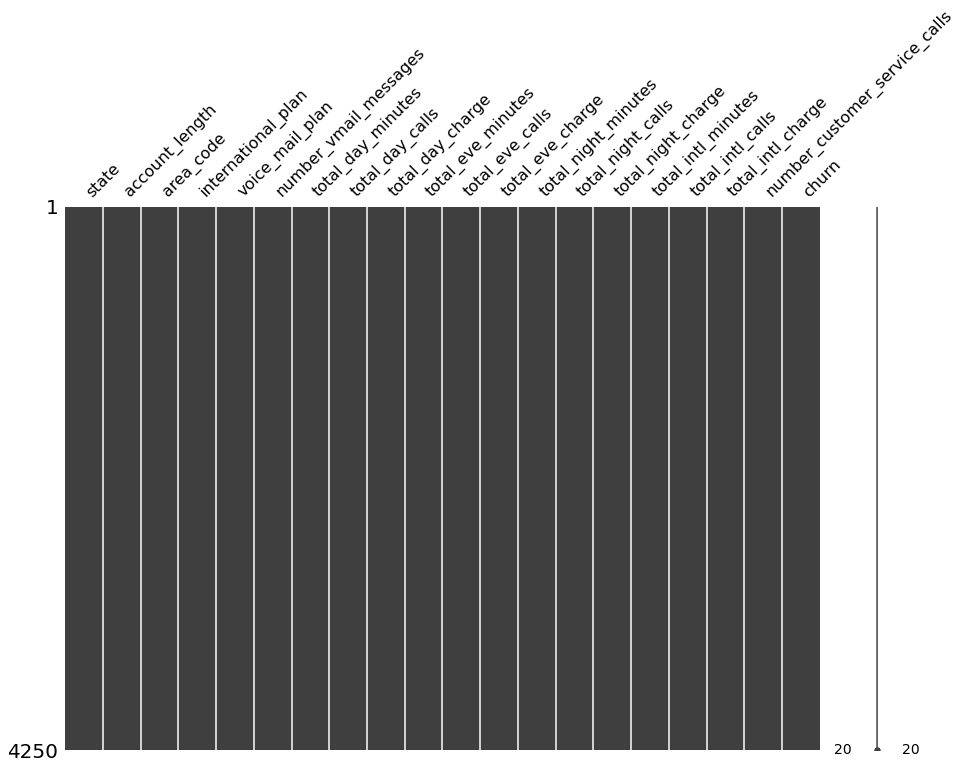

In [ ]:
#Check secara visual missing value menggunakan library missingno
import missingno as msno
plt.figure()

msno.matrix(df, figsize = (15,10))
plt.show()

In [ ]:
#Check informasi mengenai tipe dataset pada masing-masong kolom 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
#Check jumlah kolom dan baris dataset
df.shape

(4250, 20)

**Descriptive statistics**

In [ ]:
#Check informasi statistik pada dataset
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


kita dapat melihat atau memvisualisasikan data secara univariat terkait presentase data churn dari pelanggan. Menggunakan fungsi value.counts() untuk menghitung banyaknya unik dari sebuah kolom, pie() untuk membuat pie chart.

not_churned:  3652 , churned:  598


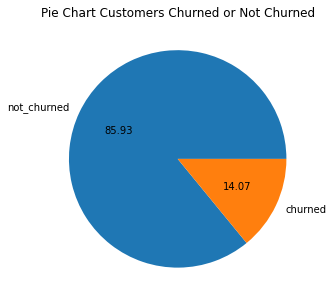

In [ ]:
#checking imbalance data dan visualisasikan menggunakan pie chart

not_churned = df[df['churn']=='no']['churn'].count()
churned = df[df['churn']=='yes']['churn'].count()
print('not_churned: ',not_churned,', churned: ',churned)

fig = plt.figure(figsize=(5,5)) 
plt.pie([not_churned,churned], labels=['not_churned','churned'],autopct='%.2f')
plt.title('Pie Chart Customers Churned or Not Churned')
plt.show()

In [ ]:
#Function for categorical dan numerical
def get_cat_cols(df):
    num=list(df.columns[df.dtypes=='object'])
    return num
    
def get_num_cols(df):
    cat=list(df.columns[df.dtypes=='int64'])+list(df.columns[df.dtypes=='int32'])+list(df.columns[df.dtypes=='float64'])
    return cat

Target variable distribution

In [ ]:
#define target variable
target_variable = 'churn'

df[target_variable].value_counts(normalize=True)

no     0.859294
yes    0.140706
Name: churn, dtype: float64

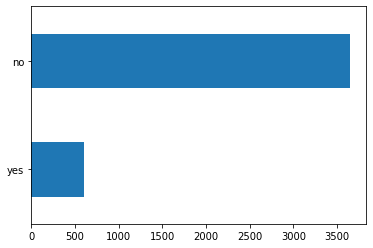

In [ ]:
df[target_variable].value_counts().sort_values().plot(kind = 'barh')

Numerical variable distribution

In [ ]:
num_col = get_num_cols(df.drop(target_variable, axis=1))
num_col

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_eve_calls',
 'total_night_calls',
 'total_intl_calls',
 'number_customer_service_calls',
 'total_day_minutes',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_charge']

In [ ]:
#numerical variable distribution
import matplotlib.pyplot as plt
import plotly.express as px

for col in num_col:
  fig = px.histogram(df, x=col, marginal='box', width=500, height=400, color=target_variable)
  fig.show()

Categorical feature distribution

In [ ]:
cat_col = get_cat_cols(df)
cat_col

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [ ]:
for i in cat_col:
  fig = px.histogram(df, x=i, width=500, height=400, color=target_variable, barmode="group")
  fig.show()

Untuk menentukan fitur-fitur yang diperlukan pada data numerik, kita dapat menggunakan bantuan Heatmap untuk dapat melihat korelasi fitur-fitur tersebut terhadap variable Churn selaku target value yang akan diprediksi.

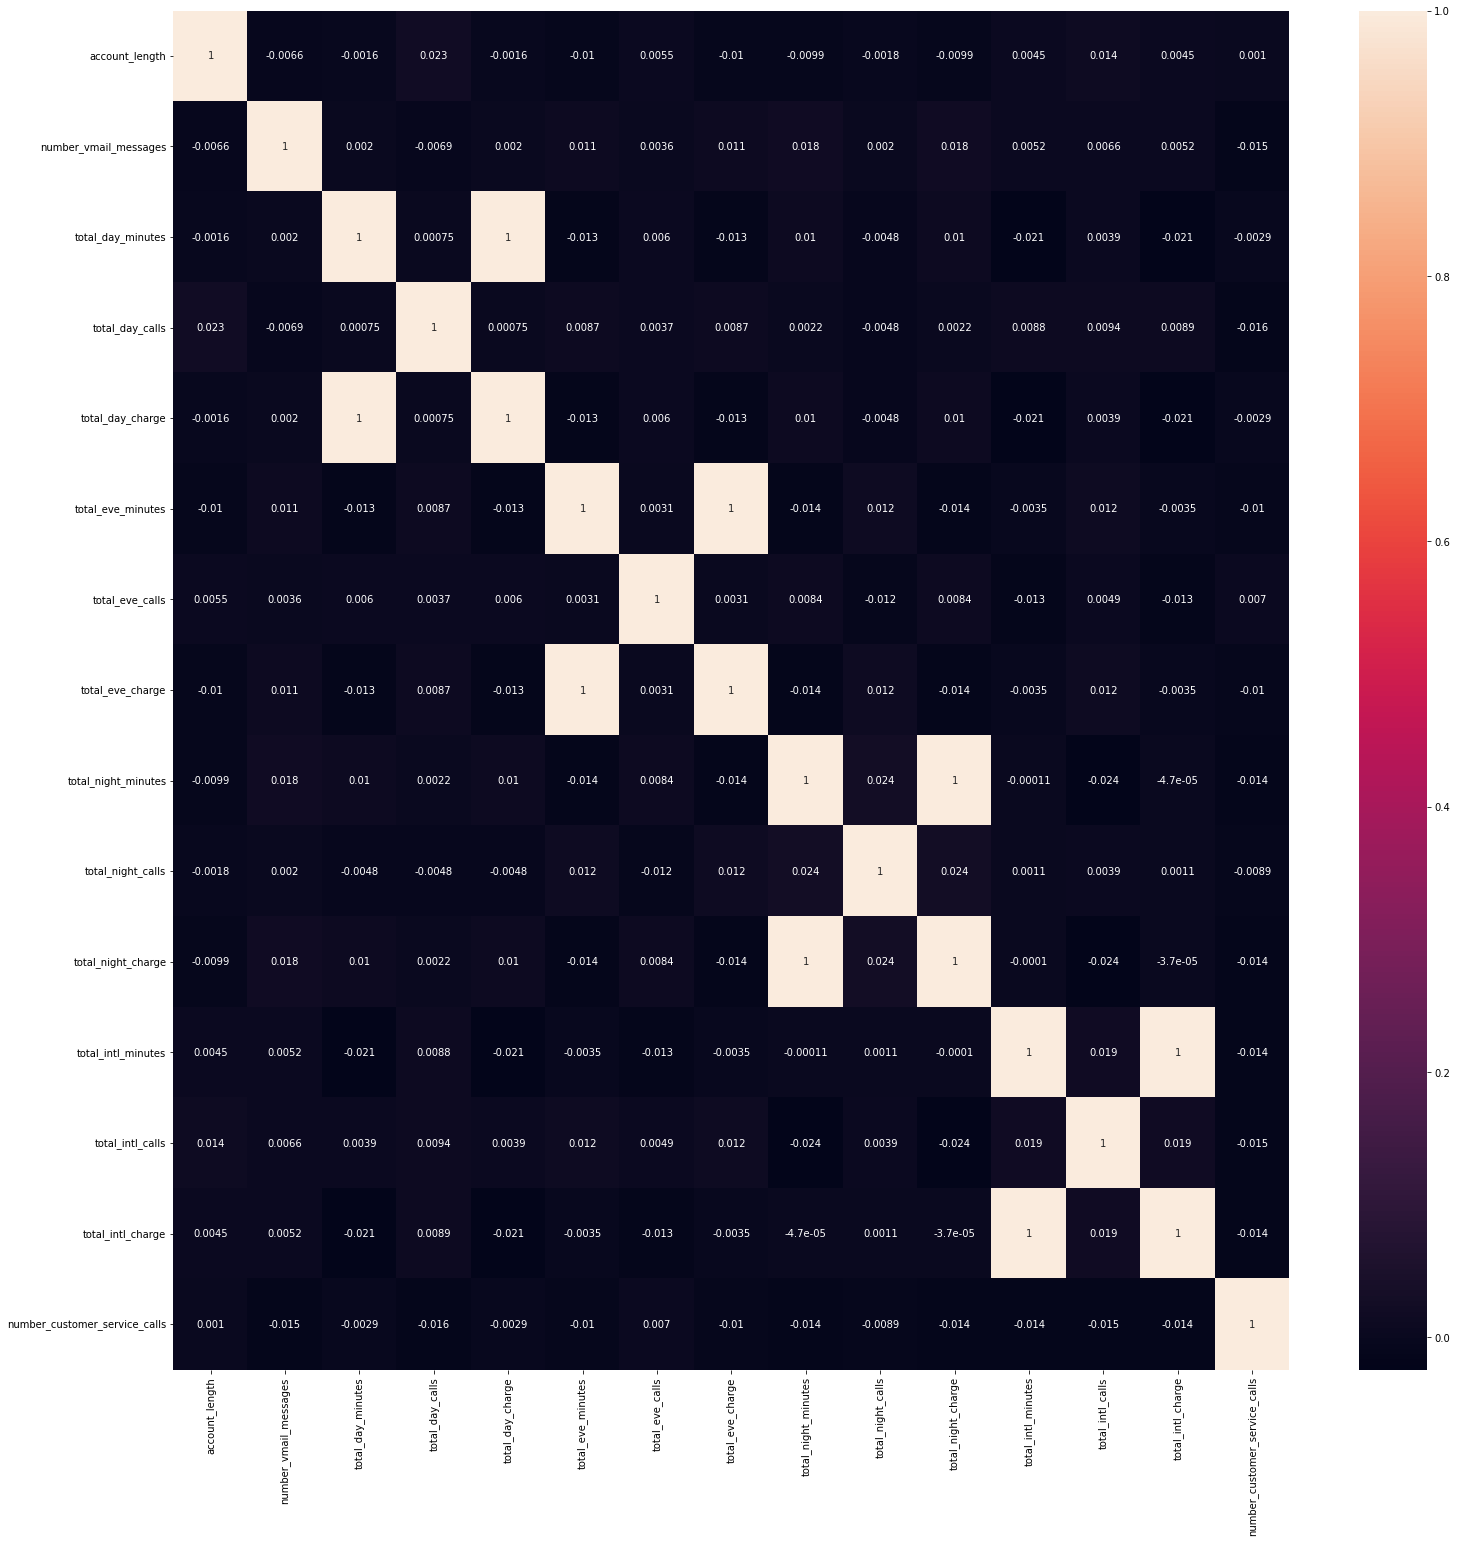

In [ ]:
plt.figure(figsize=(25,25))

sns.heatmap(df.corr(), annot = True)
plt.show()

<Figure size 432x288 with 0 Axes>

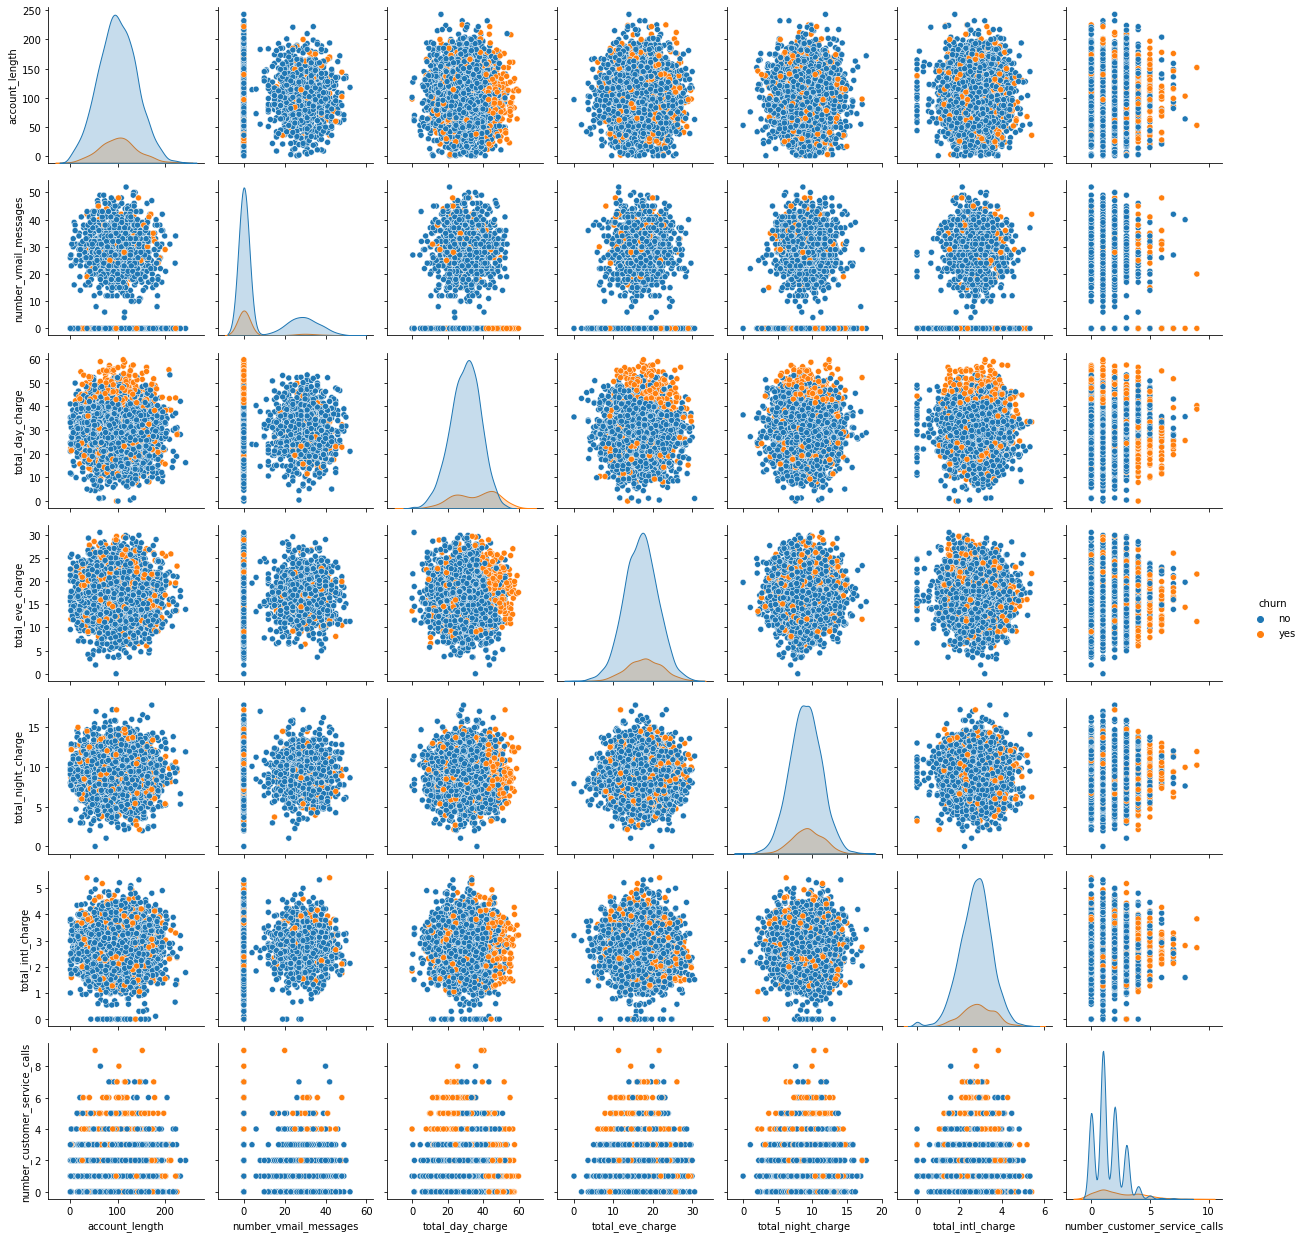

In [ ]:
#checking pair plots

plt.figure()
sns.pairplot(df,vars=['account_length', 'number_vmail_messages', 'total_day_charge', 
                      'total_eve_charge', 'total_night_charge', 'total_intl_charge', 
                      'number_customer_service_calls'], hue='churn')

**Data Preprocessing**


Normalization-numerical Feature

In [ ]:
#import library
from sklearn.preprocessing import MinMaxScaler  

#normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(df[num_col])

#buatkan dan simpan pada tabel gunakan pd.Dataframe
X_transform = pd.DataFrame(X_transform,columns = num_col)
X_transform.head()

,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge
0,0.438017,0.500000,0.745455,0.605882,0.588571,0.15,0.111111,0.459744,0.459672,0.544114,0.544204,0.644051,0.644344,0.685,0.685185
1,0.561983,0.000000,0.690909,0.647059,0.594286,0.25,0.000000,0.692461,0.692436,0.337323,0.337263,0.411646,0.411930,0.610,0.609259
2,0.342975,0.000000,0.430303,0.517647,0.508571,0.35,0.222222,0.851778,0.851740,0.172279,0.172233,0.498481,0.498593,0.330,0.329630
3,0.305785,0.000000,0.684848,0.717647,0.691429,0.15,0.333333,0.474253,0.474230,0.412747,0.412901,0.473165,0.473270,0.505,0.505556
4,0.495868,0.461538,0.533333,0.635294,0.674286,0.35,0.333333,0.620768,0.620649,0.969942,0.969876,0.538228,0.538548,0.375,0.375926


In [ ]:
df.shape

(4250, 20)

One Hot Encoder - Categorical

In [ ]:
#label encoding data
#import Laber Encoder
from sklearn.preprocessing import LabelEncoder

cat_col = get_cat_cols(df)  #get cat from dataset(df)
cat_col

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [ ]:
mydf=df.copy()

In [ ]:
#new_df = pd.concat([X_transform, df[cat_col], 
                    #df[target_variable]], axis=1)
#new_df.shape

#print(new_df.head())

#Remove the unnecessary columns customerID & UpdatedAt

new_df = mydf.drop(['state','area_code'], axis=1)
print(new_df.head())

   account_length international_plan voice_mail_plan  number_vmail_messages  \
0             107                 no             yes                     26   
1             137                 no              no                      0   
2              84                yes              no                      0   
3              75                yes              no                      0   
4             121                 no             yes                     24   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              161.6              123             27.47              195.5   
1              243.4              114             41.38              121.2   
2              299.4               71             50.90               61.9   
3              166.7              113             28.34              148.3   
4              218.2               88             37.09              348.5   

   total_eve_calls  total_eve_charge  total_night_minute

In [ ]:
#konversi semua variabel tipe categorical ke tipe numerical  
for column in new_df.columns:
    if new_df[column].dtype == np.number: continue
    #terapkan encoding pada tiap variabel categorical
    new_df[column] = LabelEncoder().fit_transform(new_df[column])
print(df.head())

  state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



**Splitting Dataset**

Tahap selanjutnya yaitu splitting dataset di mana membagi dataset menjadi data training dan juga data testing. Data yang akan digunakan merupakan data dari hasil analisa sebelumnya new_df dengan porsi 90% data train dan 10% data testing serta berdasarkan dengan variabel predictor (X) dan target (Y). Menggunakan tarin_test_split() untuk membagi dataset tersebut. 

In [ ]:
#predictor dan target
X = new_df.drop(target_variable, axis=1)
y = new_df[[target_variable]]

print("predictor (X) Shape ->",X.shape)
print("Target(y) Shape ->",y.head())

predictor (X) Shape -> (4250, 17)
Target(y) Shape ->    churn
0      0
1      0
2      0
3      0
4      0


In [ ]:
#splitting data (90% dan 10%)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.1, random_state=52)


# Print output dari masing-masing jumlah baris dan kolom pada data train dan test
print("Jumlah baris dan kolom dari x_train adalah:", x_train.shape,", sedangkan Jumlah baris dan kolom dari y_train:", 
      y_train.shape)
print("Presentase Churn di data Train:")
print(y_train.value_counts(normalize=True))
print("Jumlah baris dan kolom dari x_test adalah:", x_test.shape,", sedangkan Jumlah baris dan kolom dari y_test :", 
      y_test.shape)
print("Presentase Churn di data Test:")
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (3825, 17) , sedangkan Jumlah baris dan kolom dari y_train: (3825, 1)
Presentase Churn di data Train:
churn
0        0.858301
1        0.141699
dtype: float64
Jumlah baris dan kolom dari x_test adalah: (425, 17) , sedangkan Jumlah baris dan kolom dari y_test : (425, 1)
Presentase Churn di data Test:
churn
0        0.868235
1        0.131765
dtype: float64


**Skenario tanpa Resampling Data**

In [ ]:
#build model menggunakan LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

clf = LogisticRegression(random_state=52)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy is ', accuracy_score(y_test, y_pred))

Accuracy is  0.8588235294117647


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.87      0.98      0.92       369
           1       0.25      0.04      0.06        56

    accuracy                           0.86       425
   macro avg       0.56      0.51      0.49       425
weighted avg       0.79      0.86      0.81       425



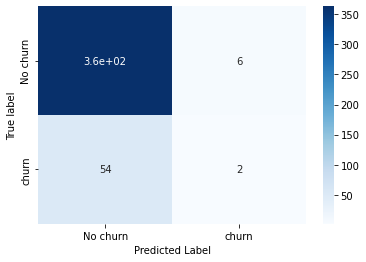

In [ ]:
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cf_matrix, columns=['No churn', 'churn'], index=['No churn', 'churn'])
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted Label'
sns.heatmap(df_cm, cmap='Blues', annot=True)

**Resampling**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
sm = SMOTE(random_state=52)
X_res, y_res = sm.fit_resample(x_train, y_train)
print("Original dataset shape is", Counter(y_train))
print("Resample dataset shape is", Counter(y_res))

Original dataset shape is Counter({'churn': 1})
Resample dataset shape is Counter({'churn': 1})


In [ ]:
clf = LogisticRegression(random_state=52)
clf.fit(X_res, y_res)
y_pred = clf.predict(x_test)
print("Acuracy --", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Acuracy -- 0.6376470588235295


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.93      0.63      0.75       369
           1       0.22      0.70      0.34        56

    accuracy                           0.64       425
   macro avg       0.58      0.66      0.54       425
weighted avg       0.84      0.64      0.70       425



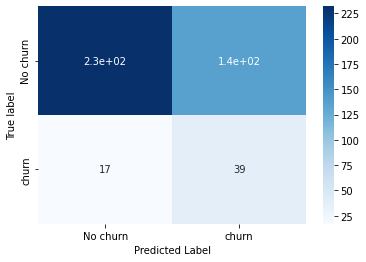

In [ ]:
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cf_matrix, columns=['No churn', 'churn'], index=['No churn', 'churn'])
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted Label'
sns.heatmap(df_cm, cmap='Blues', annot=True)

In [ ]:
y_train.value_counts()

churn
0        3283
1         542
dtype: int64

In [ ]:
y_train.value_counts(normalize=True)

churn
0        0.858301
1        0.141699
dtype: float64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X_rus, y_rus = RandomUnderSampler().fit_resample(x_train, y_train)

print(X_rus.value_counts())
print(y_rus.value_counts(normalize=True))

account_length  international_plan  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  total_night_charge  total_intl_minutes  total_intl_calls  total_intl_charge  number_customer_service_calls
1               1                   0                0                      132.1              6                22.46             138.9              49               11.81             192.6                81                 8.67                9.1                 1                 2.46               2                                1
118             0                   0                0                      230.4              80               39.17             225.0              62               19.13             198.5                73                 8.93                7.6                 6                 2.05               3                               

Build model dengan beberapa metode

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
# membuat fungsi evaluasi model
def evaluasi_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    return roc_auc_score(y_test, y_pred)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_rus, y_rus)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [ ]:
print(evaluasi_model(knn, X_rus, y_rus))
print(evaluasi_model(knn, x_test, y_test))

0.746309963099631
0.6017469996128533


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_rus, y_rus)

DecisionTreeClassifier()

In [ ]:
print(evaluasi_model(dtc, X_rus, y_rus))
print(evaluasi_model(dtc, x_test, y_test))

1.0
0.8388259775454897


In [ ]:
print('Thank You')

Thank You
